In [ ]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_upp = pd.read_csv('drive/MyDrive/Mulheres.Tech/GrupoIndigo/Database/upp.csv')
upp = pd.read_csv('drive/MyDrive/Mulheres.Tech/GrupoIndigo/Database/upp.csv')
display(upp.head())

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,19
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,0,2,0,1,0,0,0,0,0,9
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,0,1,1,0,0,0,0,12


In [ ]:
arr=np.array(upp['registro_ocorrencias'])


In [ ]:
#Total de Registros de Ocorrencia por UPP
ro = df_upp.groupby("upp")["registro_ocorrencias"].sum()

#Percentual de registro de ocorrencias por ano
pro = (df_upp.groupby("ano")["registro_ocorrencias"].sum() / df_upp.groupby("ano")["registro_ocorrencias"].sum().sum()).sort_values()*100

#Transformando percentual em array
arr_ro = np.array(pro)
display(arr_ro)


array([4.26000698, 4.37017098, 4.66327701, 4.74153831, 5.0600668 ,
       5.84916006, 6.98021036, 7.40541349, 7.43731619, 7.86551019,
       7.88544938, 7.92582623, 8.27276806, 8.47415383, 8.80913215])

**Resumos Estátisticos**

In [ ]:
#Cálculo dos Quartis:
q1=np.percentile(arr_ro,25) # o primeiro quartil representa 25% do total da amostra
q2=np.percentile(arr_ro,50) # mediana pode ser interpretada como o seu segundo quartil (quartil 50)
q3=np.percentile(arr_ro,75) # o terceiro quartil representa do total da amostra

#Resumo Estátistico:
media = np.mean(arr_ro)
mediana = np.median(arr_ro)
distancia = (media-mediana)/mediana*100

#Cálculos para verificação de intervalo InterQuartil (IQR) e seus limites:
iqr=q3-q1
limite_superior=q3+(1.5*iqr)
limite_inferior=q1-(1.5*iqr)


#INTERVALO INTERQUARTIL:
if q1 <= media <= q3:
    print("A média está DENTRO do intervalo interquartil, o que sugere confiabilidade.")
else:
    print("A média está FORA do intervalo interquartil, o que sugere MENOS confiabilidade.")



#Resumo Estatísticos:
# print(f"Média: {media}")
# print(f"Mediana: {mediana}")
# print(f"Distância entre média e mediana: {distancia:.2f}%")
# print(f"Primeiro Quartil (Q1): {q1}")
# print(f"Segundo Quartil (Q2): {q2}")
# print(f"Terceiro Quartil (Q3): {q3}")
# print(f"Intervalo InterQuartil: {iqr}")
# print(f"Limite Superior: {limite_superior}")
# print(f"Limite Inferior: {limite_inferior}")

A média está DENTRO do intervalo interquartil, o que sugere confiabilidade.


**Dispersão**

In [ ]:
#Medidas de Dispersão
valor_maximo = df_upp['registro_ocorrencias'].max()
valores_minimo = df_upp['registro_ocorrencias'].min()
amplitude_total = valor_maximo - valores_minimo

print(f"Menor Valor: {valores_minimo}")
print(f"Maior Valor: {valor_maximo}")
print(f"Amplitude: {amplitude_total}")

#diferenças em relação à média
diferencas=[x - media for x in arr]
# display(diferencas)

Menor Valor: 0
Maior Valor: 328
Amplitude: 328


In [ ]:
#elevando as diferenças ao quadrado
quadrados_das_diferencas=[x ** 2 for x in diferencas]
# display(quadrados_das_diferencas)

#calcular a média dos quadrados das diferenças
variancia=sum(quadrados_das_diferencas)/len(quadrados_das_diferencas)
print(variancia)

#calcular o desvio-padrão (raiz quadrada da variância)
desviopadrao=variancia**0.5
# print(desviopadrao)

1537.5140961857137


**Cálculos com Pandas e Numpy**

In [ ]:
display(arr)
#Numpy - cálculo da variância
variancia=np.var(arr)
print(variancia)

#Numpy - cálculo do desvio-padrão
desviopadrao=np.std(arr)
print(desviopadrao)

array([ 11,  98,  19, ...,  42,  31, 146])

1153.4300494879553
33.96218558173127


In [ ]:

#cálculo da variância
arr2=pd.Series(arr)
variancia=arr2.var()
print(variancia)

#cálculo do desvio-padrão
desviopadrao=arr2.std()
print(desviopadrao)

display(arr2)

1153.581081313218
33.964409038186105


,0
0,11
1,98
2,19
3,9
4,12
...,...
7633,5
7634,43
7635,42
7636,31


**Variação**

In [ ]:
#coeficiente de variação (CV) é o desvio-padrão dividido pela média
coef_variacao=desviopadrao/media
print(coef_variacao)

#cálculo da distância da variância em relação à média
distancia=variancia / (media**2)
print(distancia*100,'%')

5.094661355727916
2595.55743295474 %


**Assimetria**

In [ ]:
#Calculando a assimetria
assimetria=df_upp['registro_ocorrencias'].skew()
media=df_upp['registro_ocorrencias'].mean()
mediana=df_upp['registro_ocorrencias'].median()

print(f'Assimetria:{assimetria}')
print(f'Média:{media}')
print(f'Mediana:{mediana}')

#interpretação
if -0.5 <= assimetria <= 0.5:
    resultado="Distribuição Simétrica"
elif assimetria > 0.5:
    resultado="Distribuição Assimétrica Positiva"
else:
    resultado="Distribuição Assimétrica Negativa"

print(resultado)

Assimetria:3.435748394685452
Média:26.264728986645718
Mediana:17.0
Distribuição Assimétrica Positiva


**Curtose**

In [ ]:
#Calculando a curtose
curtose=df_upp['registro_ocorrencias'].kurtosis()
print(f'Curtose:{curtose}')

#interpretação

if 2.5 <= curtose <= 3.5:
    resultado2="Distribuição Mesocúrtica"
elif curtose < 2.5:
    resultado2="Distribuição Platicúrtica"
else:
    resultado2="Distribuição Leptocúrtica"

print(resultado2)

Curtose:16.28406521509206
Distribuição Leptocúrtica


**Gráficos**

In [ ]:
#Filtros para o gráfico
# hd_ano = upp.groupby['hom_doloso']

# display(df_pandas["UF"].describe())

# (df_pandas[df_pandas["MÊS COMPETÊNCIA"]==202401])
# display(hd_ano)


#display(upp.groupby('ano')['registro_ocorrencias'].value_counts())
# Somar ocorrências violentas por UPP e ano

#Ocorrências violentas por UPP e ano
# ocorrencias_violentas = df_upp.groupby(['upp', 'ano'])[['hom_doloso', 'latrocinio', 'tentat_hom', 'estupro']].sum()
# display(ocorrencias_violentas)

# Tendência anual de homicídios dolosos
# tendencia_hom_doloso = df_upp.groupby('ano')['hom_doloso'].sum()
# display(tendencia_hom_doloso)

# # Para observar as ocorrências mensais em 2019, por exemplo:
# df_upp_2019 = df_upp[df_upp['ano'] == 2019].groupby('mes')['registro_ocorrencias'].sum()
# display(df_upp_2019)

# # Tendência anual de homicídios dolosos
# tendencia_hom_doloso = df_upp.groupby('ano')['hom_doloso'].sum()
# display(tendencia_hom_doloso)

# # Para observar as ocorrências mensais em 2019, por exemplo:
# df_upp_2019 = df_upp[df_upp['ano'] == 2019].groupby('mes')['registro_ocorrencias'].sum()
# display(df_upp_2019)

# # Total de roubos por UPP e ano
# roubos_por_upp = df_upp.groupby(['upp', 'ano'])[['roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'total_roubos']].sum()
# display(roubos_por_upp)

# # Percentual de roubos em relação ao total de ocorrências
# df_upp['percentual_roubos'] = (df_upp['total_roubos'] / df_upp['registro_ocorrencias']) * 100
# display(df_upp[['upp', 'ano', 'total_roubos', 'registro_ocorrencias', 'percentual_roubos']].head())

# # Apreensões por UPP e ano
# apreensoes_por_upp = df_upp.groupby(['upp', 'ano'])[['apreensao_drogas', 'recuperacao_veiculos', 'armas_apreendidas']].sum()
# display(apreensoes_por_upp)

# # Casos de desaparecimento e mortes de policiais por UPP
# desaparecimentos_mortes = df_upp.groupby(['upp'])[['pessoas_desaparecidas', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']].sum()
# display(desaparecimentos_mortes)


# Calcular média, variância e desvio-padrão de registro de ocorrências por UPP
variabilidade_upp = df_upp.groupby("upp")["registro_ocorrencias"].agg(['mean', 'var', 'std'])
print("Variabilidade por UPP:")
print(variabilidade_upp)



Variabilidade por UPP:
                                    mean          var        std
upp                                                             
Adeus / Baiana                 20.308458   174.314378  13.202817
Alemão                         10.273632   121.409751  11.018609
Andaraí                        22.681592   181.228109  13.462099
Arará / Mandela                12.393035   118.589751  10.889892
Barreira do Vasco / Tuiuti     57.502488  1394.351244  37.341013
Batam                          25.960199   253.598408  15.924773
Borel                          24.174129   175.534527  13.248944
Caju                           14.079602   106.533632  10.321513
Camarista Méier                29.482587   331.330945  18.202498
Cerro-Corá                      4.288557    11.786318   3.433121
Chapéu Mangueira / Babilônia   10.532338    40.710199   6.380454
Chatuba                        11.029851    43.319104   6.581725
Cidade de Deus                108.855721  3963.044080  62.952713
Co

<Figure size 1200x800 with 0 Axes>

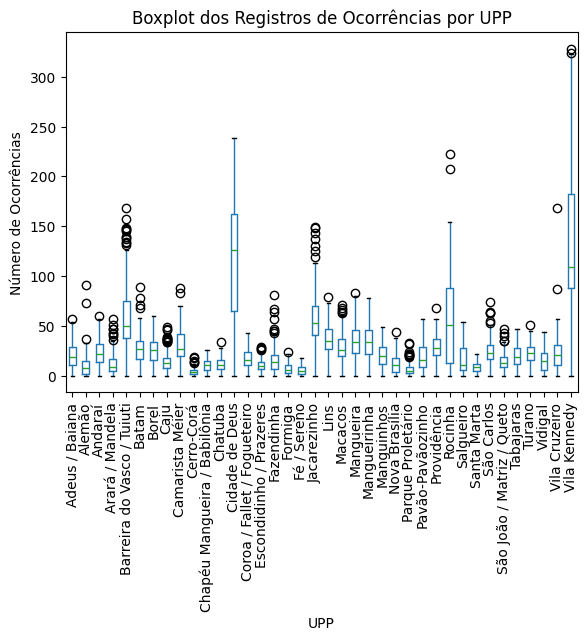

In [ ]:
import matplotlib.pyplot as plt

# Criar o boxplot para as UPPs
plt.figure(figsize=(12, 8))
df_upp.boxplot(column='registro_ocorrencias', by='upp', grid=False)

# Personalizar o gráfico
plt.title('Boxplot dos Registros de Ocorrências por UPP')
plt.suptitle("")  # Remove o título padrão de matplotlib para a figura
plt.xlabel('UPP')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=90)  # Rotaciona os nomes das UPPs para melhor leitura
plt.show()


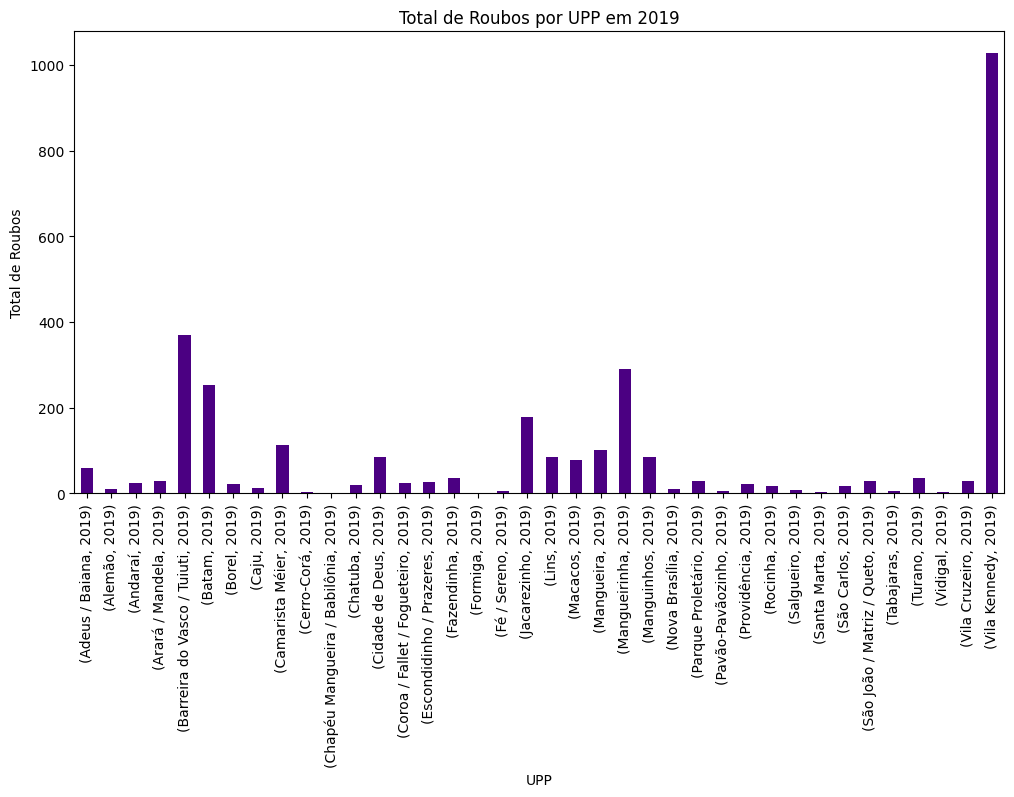

In [ ]:
# Gráfico de barras dos roubos por UPP em um ano específico
upp_2019 = roubos_por_upp.loc[(slice(None), 2019), 'total_roubos']
upp_2019.plot(kind='bar', figsize=(12, 6), color='indigo')
plt.xlabel('UPP')
plt.ylabel('Total de Roubos')
plt.title('Total de Roubos por UPP em 2019')
plt.show()




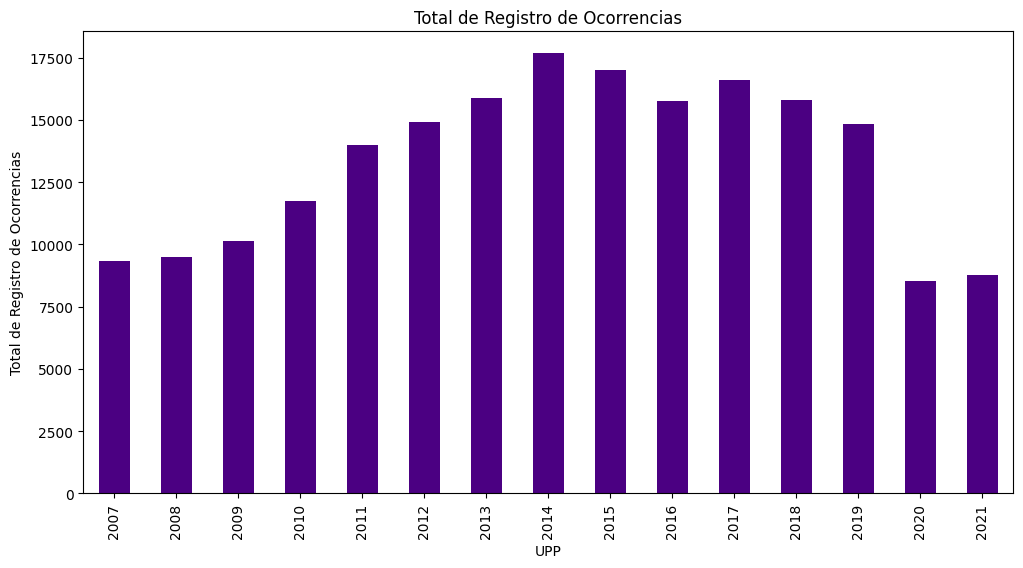

In [74]:
# Gráfico de barras dos roubos por UPP em um ano específico
tot_ro = df_upp.groupby("ano")["registro_ocorrencias"].sum()

tot_ro.plot(kind='bar', figsize=(12, 6), color='indigo')
plt.xlabel('UPP')
plt.ylabel('Total de Registro de Ocorrencias')
plt.title('Total de Registro de Ocorrencias')
plt.show()


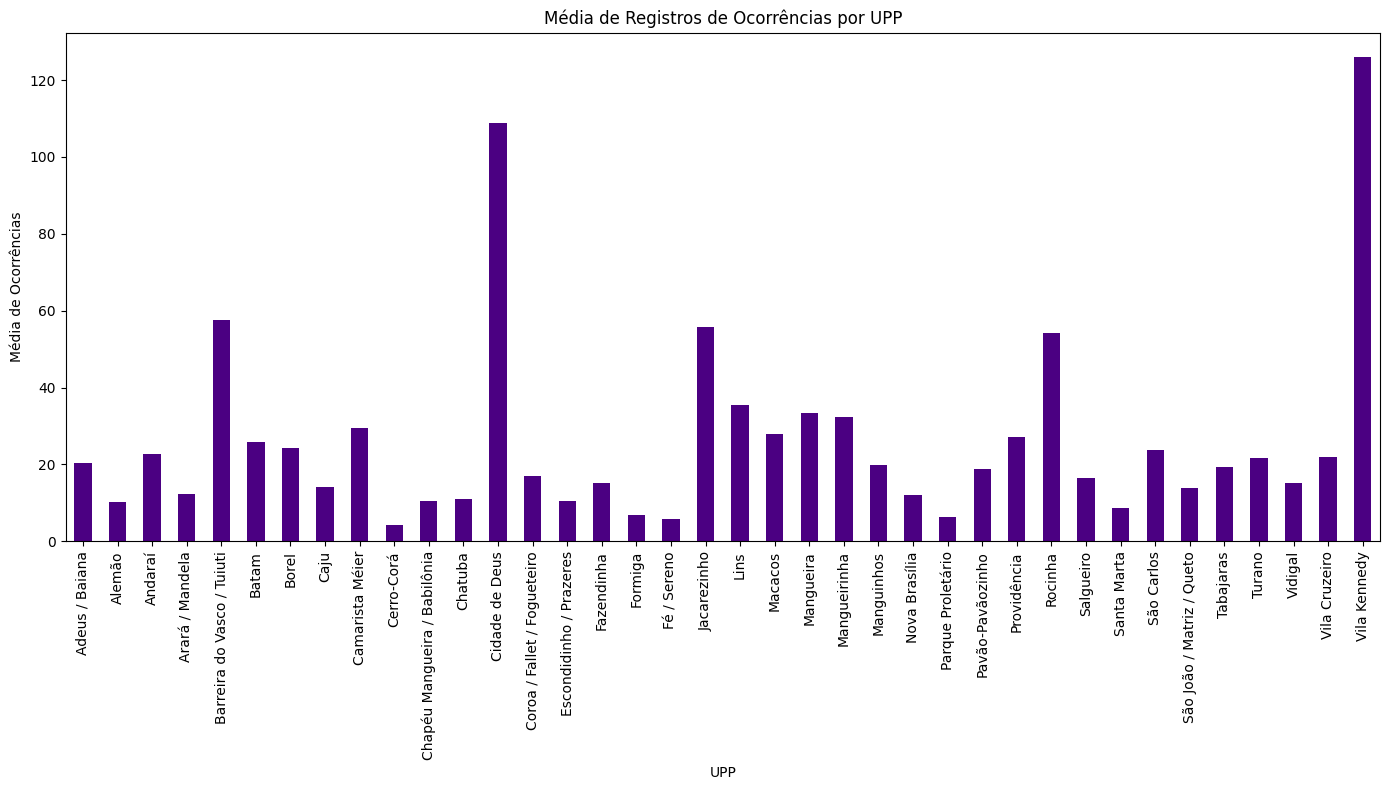

In [71]:

# Calcular a média de registros de ocorrências por UPP
media_ocorrencias_upp = df_upp.groupby("upp")["registro_ocorrencias"].mean()

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
media_ocorrencias_upp.plot(kind='bar', color='indigo')

# Personalizar o gráfico
plt.title('Média de Registros de Ocorrências por UPP')
plt.xlabel('UPP')
plt.ylabel('Média de Ocorrências')
plt.xticks(rotation=90)  # Rotaciona os nomes das UPPs para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para evitar corte das legendas

# Exibir o gráfico
plt.show()
